Dataset Description
This dataset contains census data regarding a number of characteristics about citizens, an whether or not they make more than $50 000 a year.

Data Attributes:The main data that i will be analysing is data in relation to family status, including relationship and marital status.

Data Analysis

 # Importing File

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../data/raw/adult.data")
df

,age,education-num,marital-status,relationship,sex,workclass,capital-gain,capital-loss,native-country,age,education,fnlwgt,hours-per-week,occupation,race
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.columns = ['age',  'workclass','fnlwgt', 'education','education-num','marital-status','occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss' ,  'hours-per-week','native-country', 'salary' ]

# Cleaning

In [4]:
df.dropna(axis=0)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df_clean2 = (df.drop(['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'occupation', 'capital-gain', 'capital-loss', 'hours-per-week'], axis=1))

In [6]:
df_clean2['salary'] = pd.factorize(df['salary'])[0]
df_clean2
#This makes it easier to use the 'salary' column in many types of vizualizations

,marital-status,relationship,race,sex,native-country,salary
0,Never-married,Not-in-family,White,Male,United-States,0
1,Married-civ-spouse,Husband,White,Male,United-States,0
2,Divorced,Not-in-family,White,Male,United-States,0
3,Married-civ-spouse,Husband,Black,Male,United-States,0
4,Married-civ-spouse,Wife,Black,Female,Cuba,0
...,...,...,...,...,...,...
32556,Married-civ-spouse,Wife,White,Female,United-States,0
32557,Married-civ-spouse,Husband,White,Male,United-States,1
32558,Widowed,Unmarried,White,Female,United-States,0
32559,Never-married,Own-child,White,Male,United-States,0


# Finding the most Common Response Within the data

In [7]:
from scipy import stats
a = np.array(df["marital-status"])
m = stats.mode(a)
print(m)

ModeResult(mode=array([' Married-civ-spouse'], dtype=object), count=array([14976]))


In [8]:
from scipy import stats
a = np.array(df["relationship"])
m = stats.mode(a)
print(m)

ModeResult(mode=array([' Husband'], dtype=object), count=array([13193]))


In [9]:
from scipy import stats
a = np.array(df["sex"])
m = stats.mode(a)
print(m)

ModeResult(mode=array([' Male'], dtype=object), count=array([21790]))


In [10]:
from scipy import stats
a = np.array(df["native-country"])
m = stats.mode(a)
print(m)

ModeResult(mode=array([' United-States'], dtype=object), count=array([29170]))


The above infomation tells that in the census, the most common arital status was married to a civil spouce, the most common standing in a relationship is as a husband, there were more males who answered the survey, and that the most people were United States Natives.

# Comparing Data Between Salary Groups

 Making multiple data sets to compare to one another is what makes the data useful to answer the research question.

In [12]:
df2 = df_clean2[df_clean2['salary'] < .5 ] #less than 50k
df3 = df_clean2[df_clean2['salary'] >.5 ] # more than 50k


Plotting all of df, df1, and df2

Text(0, 0.5, 'relationship')

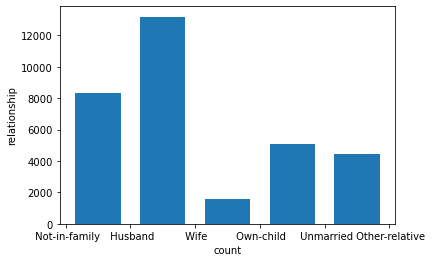

In [13]:
fig = plt.hist(df_clean2['relationship'], bins=5, rwidth=.7)
plt.xlabel('count')
plt.ylabel('relationship')

In [ ]:
#In all of the data, this is the distribution as to how the person related to their family.

Text(0, 0.5, 'relationship')

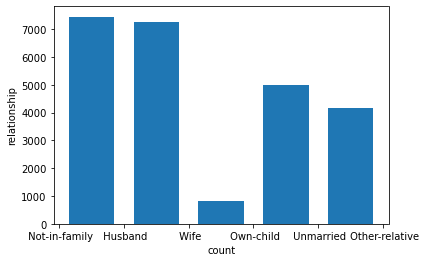

In [14]:
fig = plt.hist(df2['relationship'], bins=5, rwidth=.7)
plt.xlabel('count')
plt.ylabel('relationship')

In [ ]:
#This visualization shows a distribution of under 50k household's main earners

Text(0, 0.5, 'relationship')

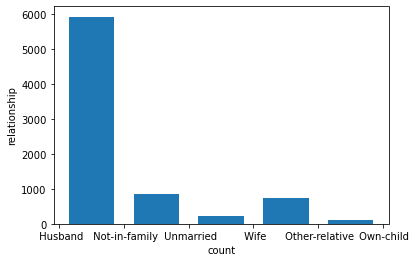

In [15]:
fig = plt.hist(df3['relationship'], bins=5, rwidth=.7)
plt.xlabel('count')
plt.ylabel('relationship')

This data shows that in the majority of households making over 50k, it is a family, with the husband being the earner.

In [16]:
df_clean2.to_csv(f"../data/processed/analysis2.csv", index=None)


In [ ]:
df = (
    pd.read_csv("../data/raw/adult.data")
        .rename(columns={"education_num":"workclass"})
        .rename(columns={"relationship":"education"})
        .rename(columns={"sex":"education_num"})
        .rename(columns={"workclass":"marital_status"})
        .rename(columns={"capital_gain":"occupation"})
        .rename(columns={"capital_loss":"relationship"})
        .rename(columns={"native_country":"race"})
        .rename(columns={"age":"sex"})
        .rename(columns={"education":"capital_gain"})
        .rename(columns={"fnlwght":"capital_loss"})
        .rename(columns={"occupation":"native_country"})
        .rename(columns={"race":"salary"})
        .dropna(axis=0))

because of the nature of our data, method chaining does not really make it easier to interpret.